# Tides

``` {index} Tides
```
Tides are very long wavelength and period waves and are characterised by rhythmic rise and fall of sea level over $\sim$ 0.5 day or $\sim$ full day. Tidal currents are generated by the Moon and the Sun. Tides are regular and can be predicted.

Earth and Moon rotate about its common centre of mass with a period of $\sim$ 27.3 days. Earth rotates around its axis once per day, so we would expect one high and one low tide. However, in reality there are two highs and two lows per day.

## Tide-genereting force (TGF)
Recall that gravitational attraction results in a force:
$$\mathbf{F}=G\frac{m_1m_2}{r^2}\hat{\mathbf{r}},$$
where $G=6.67\times10^{-11}\,N\,m^2\,kg^{-2}$, $r$ the distance between point masses $m_1$ and $m_2$ and $\hat{\mathbf{r}}$ is the unit vector in the direction connecting two masses. This force per unit mass can be expressed as a gradient of a scalar potential:
$$\mathbf{F}=-\nabla \Omega$$
because gravitational field is conservative, meaning the total work done to move an object in the presence of that field does not depend on the path.

Assuming $\mathbf{F}$ is the force from the Moon exerted on Earth and only varies in the radial direction:
$\Omega = -G \frac{m_M}{r}$.

We would like to find Moon's gravity influence on an arbitrary point $P$ at Earth's surface:

<img src="../images/tides_earth_moon.png" alt="TGF Earth-Moon" style="width:400px;"/>

From the cosine law, we know:

$$r_1^2=r^2+R^2-2rR\cos{\phi}\Rightarrow r_1^2=R^2\Big(1-2\frac{r}{R}\cos{\phi}+\Big(\frac{r}{R}\Big)^2\Big)$$

We can insert $r_1$ into potential scalar at point $P$:

$$\Omega_P = -G\frac{m_M}{R}\Big[1-2\frac{r}{R}\cos{\phi}+\Big(\frac{r}{R}\Big)^2\Big]^{-1/2}$$

We can expand the terms in the brackets with Legendre polynomials:
$$\Omega_P = -G\frac{m_M}{R}\Big[1+\Big(\frac{r}{R}\Big)P_1(\cos{\phi})+\Big(\frac{r}{R}\Big)^2 P_2(\cos{\phi})+\Big(\frac{r}{R}\Big)^3 P_3(\cos{\phi})+...\Big],\\
P_1(\cos{\phi})=\cos{\phi},\\
P_2(\cos{\phi})=\frac{1}{2}(3\cos^2{\phi}-1),\\
P_3(\cos{\phi})=\frac{1}{2}(5\cos^3{\phi}-3\cos{\phi}).$$

Since we know the Earth's radius and distance to the Moon, their ratio can be approximated as $\frac{r}{R}\approx \frac{1}{60} \ll 1$. Therefore, any higher order terms in the expansion will become very small and can be ignored.

To find the tide-generating force, we need to take the gradient of this potential and its first three terms:
$$\mathbf{F_p}=-\nabla\Omega_p,\quad \Omega_P = -G\frac{m_M}{R}\Big[1+\Big(\frac{r}{R}\Big)\cos{\phi}+\Big(\frac{r}{R}\Big)^2\frac{1}{2}(3\cos^2{\phi}-1)+...\Big].$$

The first term is a constant so its gradient is zero, it produces no force.

The second term needs to be differentiated with respect to $r\cos{\phi}$ (the "x" direction) and is a constant:
$$-\frac{\Omega_P}{\Omega(r\cos{\phi})}=\frac{Gm_M}{R^2}.$$
It acts in the direction along $R$ on the graph and is the centripetal acceleration.

The final term in the potential creates a **tide-generating force**:
$$\Omega_P = -\frac{1}{2}Gm_M \frac{r^2}{R^3}(3\cos^2{\phi}-1).$$
To get the vertical and horizontal force, we need to differentiate it with respect to $r$ and $\phi$:
$$F_{P}^{vert} = -\frac{\partial \Omega_P}{\partial r}=G m_M\frac{r}{R^3}(3\cos^2{\phi}-1),\\
F_{P}^{horiz}=-\frac{\partial\Omega_P}{r\partial\phi}=-\frac{6}{2}Gm_M \frac{r}{R^3}\cos{\phi}\sin{\phi}=-\frac{3}{2}Gm_M \frac{r}{R^3}\sin{2\phi}.$$

The tide-generating force is inversely proportional to the cubic distance from the Earth to the Moon.

Let's calculate the vertical and horizontal forces for point London at $51^\circ$N:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def VerticalTGF(G, mass_moon, planet_radius, distance, lat):
    return G*mass_moon*planet_radius/distance**3*(3*np.cos(lat)**2-1) 

def HorizontalTGF(G, mass_moon, planet_radius, distance, lat):
    return -3/2.*G*mass_moon*planet_radius/distance**3*np.sin(2*lat)

def TidalPotential(G, mass_moon, planet_radius, distance, lat):
    return -0.5*G*mass_moon*(planet_radius**2/distance**3)*(3*(np.cos(lat)**2)-1)

In [2]:
G = 6.67e-11          # Gravitational constant
mass_m =7.34767309e22 # Moon's mass
r = 6378000           # Earth's radius
R = 384400000         # Earth-Moon distance
phi = np.deg2rad(51)  # Latitude

print("Vertical force (N) = ", VerticalTGF(G, mass_m, r, R, phi))
print("Horizontal force (N) = ", HorizontalTGF(G, mass_m, r, R, phi))

Vertical force (N) =  1.0353180375515302e-07
Horizontal force (N) =  -8.074315039381746e-07


Horizontal force can change its sign when $\phi$ is zero and when $\phi = \pm\pi/2$. This explains why it has two bulges on Earth's surface.

<img src="../images/tides_forces.png" alt="TGF" style="width:400px;"/>

Let's plot how these forces change with latitude ($\phi$):

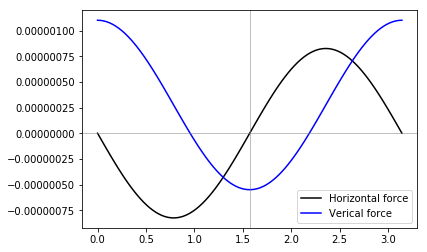

In [3]:
phi = np.linspace(0,np.pi, 100)

plt.plot(phi, HorizontalTGF(G, mass_m, r, R, phi),
         c='k', label="Horizontal force")

plt.plot(phi, VerticalTGF(G, mass_m, r, R, phi),
         c='b', label="Verical force")

plt.axhline(0, color="gray", lw=0.5)
plt.axvline(np.pi/2, color="gray", lw=0.5)

plt.legend(loc="best")
plt.show()

We can plot an exaggerated equilibrium tidal perturbation of the Earth's surface, assuming it is a perfect sphere:

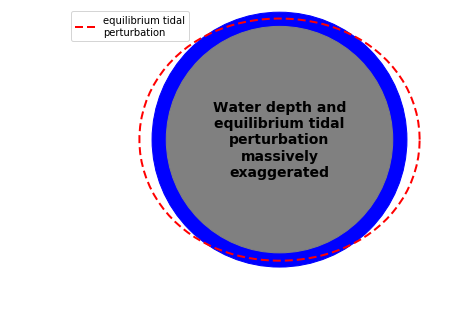

In [4]:
# Create a range of points on Earth surface
theta = np.linspace(0, 2*np.pi, 100)
x = r*np.cos(theta)
y = r*np.sin(theta)

# Create outer shell of 4000 km 
# depth (ocean) and scale by a factor of 200
# so it is noticable
factor = 200
r2 = r + factor*4000
x2 = r2*np.cos(theta)
y2 = r2*np.sin(theta)

# Create how Earth's surface deforms
# and scale by factor of 10,000
factor2 = factor*10000
r3 = r2 - factor2*TidalPotential(G, mass_m, r, R, theta)/9.8
x3 = r3*np.cos(theta)
y3 = r3*np.sin(theta)

fig, ax = plt.subplots(1, figsize=(7,7))

plt.plot(x3, y3, c="red", lw=2, dashes=(4,2),
         label="equilibrium tidal\nperturbation")

circle1 = plt.Circle((0, 0), r2, color='blue', label="ocean")
circle2 = plt.Circle((0, 0), r, color='gray')

ax.add_artist(circle1)
ax.add_artist(circle2)

plt.text(0,0, """Water depth and
equilibrium tidal
perturbation
massively
exaggerated""",
        size=14, ha="center", va="center",
         fontweight="bold")

plt.xlim(-1.2e7, 1e7)
plt.gca().set_aspect("equal")
plt.legend(loc="upper left")
plt.axis("off")
plt.show()

Horizontal force can be balanced by the sea surface gradient term $g\times grad(h)$. This is called equilibrium tide - the free surface elevation of water-covered Earth whose pressure gradient balances horizontal TGF and results in steady balanced state:
$$g\frac{1}{r}\frac{\partial h}{\partial \phi}=-\frac{1}{r}\frac{\partial \Omega_P}{\partial \phi}\Rightarrow h_{eq}=-\frac{\Omega_P}{g}.$$

For Moon $h_{eq}\sim 0.27$ m. However, Earth is not entirely water covered so we don't have an equilibirium state in reality. The tidal bulges would rotate with Earth once every 24 hours but land gets in the way.

Moon does not rotate exactly above the equator, so our equations need to be corrected for the angle $d_l$ (declination of the Moon north of the equator) and $C_p$ (the Moon's "hour" angle):

<img src="../images/tides_moon_declination.png" alt="TGF" style="width:600px;"/>

Therefore, the new formula for potential is:
$$\Omega_P = -\frac{1}{4}G m_M \frac{r^2}{R^3}[(3\sin^2{d_l}-1)(3\sin^2{\phi_P}-1)+\sin{2d_l}\sin{2\phi_P}\cos{C_P}+\cos^2{d_l}\cos^2{\phi_P}\cos{2C_P}].$$
Recall that $g=\frac{GM_E}{r^2}$ and $h_eq=-\frac{\Omega_P}{g}$:
$$h_{eq}(C_P,\phi_P, t)=r\frac{m_M}{M_E}\Big[C_0(t) \Big(\frac{3}{2}\sin^2{\phi_P}-\frac{1}{2}\Big)+C_1(t)\sin{2\phi_P}+C_2(t)\cos^2{\phi_P}\Big],\\
C_0(t) = \Big(\frac{r}{R}\Big)^3 \Big(\frac{3}{2}\sin^2{d_l}-\frac{1}{2}\Big),\\
C_1(t) = \Big(\frac{r}{R}\Big)^3 \Big(\frac{3}{4}\sin{2d_l}\cos{C_P}\Big),\\
C_2(t) = \Big(\frac{r}{R}\Big)^3 \Big(\frac{3}{4}\cos^2{2d_l}\cos{2C_P}\Big).$$

Let's look at the time-dependent coefficients:
1. First one does not vary with $C_P$, only depend on declination $d_l$. These are called the **long-period tides or species**.
2. Second term also depends on $d_l$ at twice the frequency as above, but also includes **diurnal species** at frequency one per lunar cycle ($\cos{C_P}$ factor).
3. Final term includes **semi-diurnal species** due to $\cos{2C_P}$ factor.

Lunar hour angle $C_P$ is the difference between longitude of point $P$ and location with the Moon directly overhead. It can be calculated from"
$$C_P=\omega_1 t +\lambda_P,$$
where $\omega_1=\frac{360^\circ}{24.8412 \text{hr}}=14.4921^\circ$ hr$^{-1}$.

Doodson expanded tidal potential above with Fourier series using fundamental frequencies:

$$\omega=n_1\omega_1+n_2\omega_2+...+n_6 \omega_6$$

These frequencies are known and can be looked up in a table.

<img src="../images/tides_frequencies_1.png" alt="TGF" style="width:600px;"/>
<img src="../images/tides_frequencies_2.png" alt="TGF" style="width:600px;"/>


## Tidal frequencies
``` {index} Tidal frequencies
```

The combination of the six fundamental frequencies mentioned above can be used to find important cycles - semi-diurnal cycle ($\omega_1=12.42$ hr), spring/neap cycle ($\omega_0-\omega_1=14.75$ days).

Spring-neap cycles can be explained via superposition of the principal lunar and principal solar tidal constituents: $\omega_0-\omega_1=\omega_2-\omega_3 \rightarrow M_2, S_2.$

<img src="../images/tides_principal_constituents.png" alt="TGF" style="width:600px;"/>

Using $M_2$ and $S_2$, we can plot semi-diurnal and spring-neap cycles:

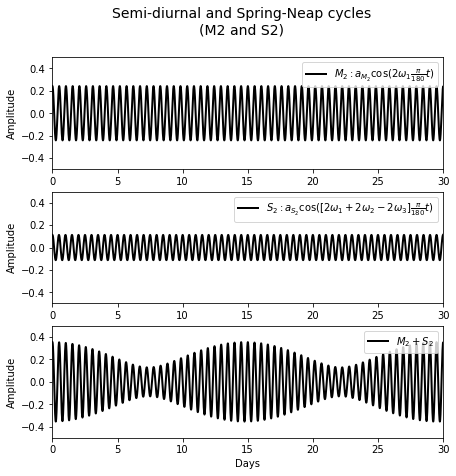

In [5]:
t = np.arange(0, 24*30, 0.05)

M2 = 0.242334*np.cos((2*14.4921)*(np.pi/180)*t)
S2 = 0.112841*np.cos((2*14.4921 + 2*0.549 - 2*0.0411)*(np.pi/180)*t)

fig, axes = plt.subplots(3,1, figsize=(7,7))

plots = [M2, S2, M2+S2]
labels = [r"$M_2: a_{M_2} \cos(2\omega_1 \frac{\pi}{180} t)$",
         r"$S_2: a_{S_2}\cos([2\omega_1+2\omega_2-2\omega_3]\frac{\pi}{180}t)$",
         "$M_2+S_2$"]

for i, ax in enumerate(axes):
    ax.plot(t/24., plots[i], color='k', lw=2, label=labels[i])
    ax.legend(loc='upper right')
    ax.set_ylim(-0.5,0.5)
    ax.set_xlim(0,30)
    ax.set_ylabel("Amplitude")

plt.xlabel('Days')
plt.suptitle("Semi-diurnal and Spring-Neap cycles\n(M2 and S2)", fontsize=14)
plt.show()

The top graph shows 57 highs in 30 days, while the middle graph shows 60 highs in 30 days.

Then we can plot diurnal inequality - $M_2$ and $K_1$:

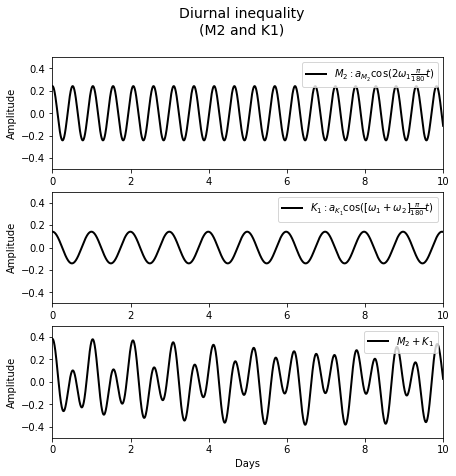

In [6]:
M2 = 0.242334*np.cos((2*14.4921)*(np.pi/180)*t);
K1 = 0.141565*np.cos((1*14.4921 + 1*0.549)*(np.pi/180)*t);

fig, axes = plt.subplots(3,1, figsize=(7,7))

plots = [M2, K1, M2+K1]
labels = [r"$M_2: a_{M_2} \cos(2\omega_1 \frac{\pi}{180} t)$",
         r"$K_1: a_{K_1}\cos([\omega_1+\omega_2]\frac{\pi}{180}t)$",
         "$M_2+K_1$"]

for i, ax in enumerate(axes):
    ax.plot(t/24., plots[i], color='k', lw=2, label=labels[i])
    ax.legend(loc="upper right")
    ax.set_ylim(-0.5,0.5)
    ax.set_xlim(0,10)
    ax.set_ylabel("Amplitude")

plt.xlabel('Days')
plt.suptitle("Diurnal inequality\n(M2 and K1)", fontsize=14)
plt.show()

We can see on the bottom graph that it has high and lows of different magnitudes within a 24 hour period.

**References:**
* The information in this notebook was compiled based on Geophysical Fluid Dynamics for the Oceans course at ESE